<a href="https://colab.research.google.com/github/YangJiao85/UNCOVER-COVID-19/blob/master/EDA_COVID_19_infection_rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA COVID-19 infection rates

How is the implementation of existing strategies affecting the rates of COVID-19 infections?


## Existing strategies

- Social distancing
    - School closing
- Use of PPE (Personal Protective Equipment)
-

## Data sources
Data Sources
- [UNCOVER COVID-19 Challenge](https://www.kaggle.com/roche-data-science-coalition/uncover); up to date version from [Namara platform](https://how-to.namara.io/#introduction)
    - ACAPS COVID-19: Govenment Measures Dataset 
    - Coronavirus Disease (COVID-19) -- Statistics and Research
  

Load essential modules

In [0]:
# essential modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as mcolors


In [0]:
# Mount google drive locally
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Load data from [Namara platform](https://app.namara.io)

Download up to date data from [Namara platform](https://app.namara.io) and save csv file to my Google Drive.

In [0]:
def load_namara(url):
    import requests
    import time
    response = requests.get(url)
    print(f"Request returned {response.status_code} : '{response.reason}'")

    i = 0
    while(response.json()['message']!='Exported'):
        time.sleep(1)
        print(response.json()['message'], i)
        i = i + 1
        response = requests.get(url)
        print(f"Request returned {response.status_code} : '{response.reason}'")

    csv_url = response.json()['url']
    csv_file = csv_url.split('?')[0].split('/')[-1]
    print("Read csv file: {}".format(csv_file))
    df = pd.read_csv(csv_url)
    print("with {} lines, {} columns".format(df.shape[0], df.shape[1]))

    gdir = "/content/gdrive/My Drive/Colab Notebooks/"
    df.to_csv(gdir+csv_file, index=False)
    print("Save a copy: {}".format(csv_file))

    d = datetime.datetime.today()
    print(d.strftime('%Y-%m-%d'))

    return df
    

In [0]:
my_api_key = <api_key>

#### Global School Closures COVID-19 -- The Humanitarian Data Exchange

In [0]:

url_school = ('https://api.namara.io/v0/data_sets'
              '/6b735c84-90fb-4b7b-8218-5cb9d58dd0d2'
              '/data/en-0/export?geometry_format=wkt'
              '&api_key=ba3007c357c09d67c2faa09edbb1927de99a0aa022cff3df26c6150e72871048'
              )
df_school = load_namara(url_school)

Request data from: 
https://api.namara.io/v0/data_sets/6b735c84-90fb-4b7b-8218-5cb9d58dd0d2/data/en-0/export?geometry_format=wkt&api_key=ba3007c357c09d67c2faa09edbb1927de99a0aa022cff3df26c6150e72871048
Request returned 200 : 'OK'
Read csv file: global-school-closures-covid-19.csv
Data saved to: global-school-closures-covid-19.csv
6412


#### ACAPS COVID-19: Govenment Measures Dataset -- The Humanitarian Data Exchange

The COVID-19 Govenment Measures Dataset puts together all the measures implemented by govenments worldwide in response to the Coronavirus pandemic.

In [0]:

url_measure = ('https://api.namara.io/v0/data_sets/'
               'f2a2f3a6-83d2-4f58-a606-85f1598884e6/'
               'data/en-3/export?geometry_format=wkt'
               '&api_key=' + my_api_key +
               '&organization_id=5e96c73c6eec7900102a37a9'
               )
df_measure = load_namara(url_measure)

Request returned 200 : 'OK'
Read csv file: acaps-covid-19-government-measures-dataset.csv
with 4149 lines, 17 columns
Save a copy: acaps-covid-19-government-measures-dataset.csv
2020-04-19


#### Coronavirus Disease (COVID-19) -Statistics and Research -- [Our World in Data](https://ourworldindata.org/coronavirus)

In [0]:

url_owd = ('https://api.namara.io/v0/data_sets/'
                   'e820187b-708c-4394-a251-8fe61b919624/'
                   'data/en-0/export?geometry_format=wkt'
                   '&api_key=' + my_api_key +
                   '&organization_id=5e96c73c6eec7900102a37a9'
                   )
df_owd = load_namara(url_owd)

Request returned 200 : 'OK'
Read csv file: coronavirus-disease-covid-19-statistics-and-research.csv
with 11617 lines, 16 columns
Save a copy: coronavirus-disease-covid-19-statistics-and-research.csv
2020-04-19


#### Johns Hopkins COVID-19 Daily Dashboard: Cases by States -- Johns Hopkins


In [0]:

url_case = ('https://api.namara.io/v0/data_sets/'
            '0ca32698-5e89-4f80-a438-322e12c49986/'
            'data/en-2/export?geometry_format=wkt'
            '&api_key=' + my_api_key +
            '&organization_id=5e96c73c6eec7900102a37a9'
            )
df_case = load_namara(url_case)

#### Tests conducted vs. Total confirmed cases of COVID-19 -- Our World in Data

Day by day

In [0]:

url_test_conf = ('https://api.namara.io/v0/data_sets/'
                 'd13a4920-218f-45cb-902a-3d5921eec187/'
                 'data/en-3/export?geometry_format=wkt'
                 '&api_key=' + my_api_key +
                 '&organization_id=5e96c73c6eec7900102a37a9'
                 )
df_test_conf = load_namara(url_test_conf)


#### World Health Organization (WHO) Situation Reports -- Our World in Data

Day by day

Cases and deaths compiled by Our World in Data research group.

In [0]:

url_who = ('https://api.namara.io/v0/data_sets/'
          '3372d93f-fcf3-46b1-9eb7-a8a27f0ab0ac/'
          'data/en-0/export?geometry_format=wkt'
          '&api_key=' + my_api_key +
          '&organization_id=5e96c73c6eec7900102a37a9'
          )
df_who = load_namara(url_who)

Request returned 200 : 'OK'
Read csv file: world-health-organization-who-situation-reports.csv
Data saved to: world-health-organization-who-situation-reports.csv


#### World Travel Restrictions -- World Food Programme, UN

Consolidated by UN - World Food Programme - Emergency Division. [http://unwfp.maps.arcgis.com/](http://unwfp.maps.arcgis.com/)

In [0]:

url_travel = ('https://api.namara.io/v0/data_sets/'
              '9e7b20b8-f54f-4781-915c-0f767ddcb8c3/'
              'data/en-1/export?geometry_format=wkt'
              '&api_key=' + my_api_key +
              '&organization_id=5e96c73c6eec7900102a37a9'
              )
df_travel = load_namara(url_travel)

#### jhu covid19 time series -- Esri

Source: [John Hopkins Center for Systems Science and Engineering feature layer](https://www.arcgis.com/home/item.html?id=c0b356e20b30490c8b8b4c7bb9554e7c). The City of LA had trouble linking directly to JHU's feature service, so we built an ETL to ingest their CSVs every hour and return a public feature layer for our use. 

In [0]:

url_jhc = ('https://api.namara.io/v0/data_sets/'
           '18e2d78f-54db-4237-af70-4aa37ce91442/'
           'data/en-1/export?geometry_format=wkt'
           '&api_key=' + my_api_key +
           '&organization_id=5e96c73c6eec7900102a37a9'
           )
df_jhc = load_namara(url_jhc)

Request returned 200 : 'OK'
Read csv file: jhu-covid19-time-series.csv
Data saved to: jhu-covid19-time-series.csv


#### Current data on the geographic distribution of COVID-19 cases worldwide -- EU



In [0]:

url_eu = ('https://api.namara.io/v0/data_sets/'
          '73e2ba2b-7a3e-4856-a9d7-a16576166791/'
          'data/en-1/export?geometry_format=wkt'
          '&api_key=' + my_api_key +
          '&organization_id=5e96c73c6eec7900102a37a9'
          )
df_eu = load_namara(url_eu)

Request returned 202 : 'Accepted'
Pending 0
Read csv file: current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv
with 11563 lines, 10 columns
Save a copy: current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv
2020-04-19


In [0]:
!ls -lh /content/gdrive/My\ Drive/Colab\ Notebooks/*.csv

-rw------- 1 root root 1.6M Apr 17 21:42 '/content/gdrive/My Drive/Colab Notebooks/acaps-covid-19-government-measures-dataset.csv'
-rw------- 1 root root 300K Apr 17 21:30 '/content/gdrive/My Drive/Colab Notebooks/global-school-closures-covid-19.csv'
-rw------- 1 root root 1.5M Apr 17 21:50 '/content/gdrive/My Drive/Colab Notebooks/jhu-covid19-time-series.csv'
-rw------- 1 root root  86K Apr 17 21:49 '/content/gdrive/My Drive/Colab Notebooks/world-health-organization-who-situation-reports.csv'


------

### Load dataset

In [0]:
gdir = "/content/gdrive/My Drive/Colab Notebooks/"
# df_school = pd.read_csv(gdir+"global-school-closures-covid-19.csv")
df_measure = pd.read_csv(gdir+"acaps-covid-19-government-measures-dataset.csv")
df_owd = pd.read_csv(gdir+"coronavirus-disease-covid-19-statistics-and-research.csv")
# df_jhc = pd.read_csv(gdir+"jhu-covid19-time-series.csv")
# df_who = pd.read_csv(gdir+"world-health-organization-who-situation-reports.csv")
# df_eu = pd.read_csv(gdir+"current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv")
print('Data loaded')

Data loaded


### An overview of dataset school closure

In [0]:
# A overview of the dataframe
print(df_school.shape)
print(df_school.columns)
print(df_school.dtypes)
country_list_school = df_school['country'].unique()
print("{} countries or regions close school".format(len(country_list_school)))
print(country_list_school)

(6412, 5)
Index(['date', 'iso', 'country', 'scale', 'note'], dtype='object')
date       object
iso        object
country    object
scale      object
note       object
dtype: object
198 countries or regions close school
['China' 'China, Hong Kong Special Administrative Region'
 'China, Macao Special Administrative Region' 'Mongolia' 'Italy'
 'San Marino' 'Bahrain' 'Iran (Islamic Republic of)' 'Pakistan'
 'United Kingdom of Great Britain and Northern Ireland' 'Iraq'
 'United States of America' 'Viet Nam' 'Kuwait' 'Armenia' 'Georgia'
 'Japan' 'Republic of Korea' 'Lebanon'
 "Democratic People's Republic of Korea" 'Afghanistan' 'Azerbaijan'
 'Germany' 'France' 'India' 'Greece' 'Portugal' 'Palestine' 'Bhutan'
 'Ukraine' 'United Arab Emirates' 'Cambodia' 'Saudi Arabia' 'Philippines'
 'Qatar' 'Slovakia' 'Albania' 'Bosnia and Herzegovina' 'Czechia' 'Spain'
 'Hungary' 'Republic of Moldova' 'North Macedonia' 'Paraguay' 'Romania'
 'Russian Federation' 'El Salvador' 'Bolivia (Plurinational State of

In [0]:
print(len(df_school['scale'].unique()))
print(len(df_school['note'].unique()))
print(len(df_school['iso'].unique()))
print(len(df_school['date'].unique()))

2
73
196
60


In [0]:
print(df_school['scale'].unique())
print(df_school['iso'].unique())
print(df_school['note'].unique())


['Localized' 'National']
['CHN' 'MNG' 'ITA' 'SMR' 'BHR' 'IRN' 'PAK' 'GBR' 'IRQ' 'USA' 'VNM' 'KWT'
 'ARM' 'GEO' 'JPN' 'KOR' 'LBN' 'PRK' 'AFG' 'AZE' 'DEU' 'FRA' 'IND' 'GRC'
 'PRT' 'PSE' 'BTN' 'UKR' 'ARE' 'KHM' 'SAU' 'PHL' 'QAT' 'SVK' 'ALB' 'BIH'
 'CZE' 'ESP' 'HUN' 'MDA' 'MKD' 'PRY' 'ROU' 'RUS' 'SLV' 'BOL' 'BRA' 'CHE'
 'DZA' 'ECU' 'HND' 'HRV' 'IRL' 'ISR' 'MDV' 'NOR' 'PAN' 'AIA' 'BEL' 'CYP'
 'DNK' 'JAM' 'LKA' 'LVA' 'MLT' 'CYM' 'TTO' 'URY' 'JOR' 'OMN' 'YEM' 'ABW'
 'AND' 'ARG' 'AUT' 'BFA' 'BGR' 'BHS' 'CAN' 'CHL' 'COL' 'EGY' 'EST' 'ETH'
 'FRO' 'GAB' 'GHA' 'GNQ' 'GRD' 'GTM' 'GUY' 'IDN' 'ISL' 'KAZ' 'KEN' 'KGZ'
 'LBR' 'LBY' 'LCA' 'LIE' 'LTU' 'LUX' 'MAR' 'MCO' 'MMR' 'MNE' 'MRT' 'MSR'
 'NAM' 'NLD' 'PER' 'POL' 'RWA' 'SDN' 'SEN' 'SLB' 'SRB' 'SUR' 'SVN' 'SYC'
 'SYR' 'TUN' 'TUR' 'UZB' 'VCT' 'BGD' 'CIV' 'CRI' 'CUW' 'GNB' 'VEN' 'CMR'
 'FIN' 'FSM' 'GMB' 'MYS' 'NPL' 'SOM' 'SWE' 'SXM' 'THA' 'ZAF' 'BRB' 'COD'
 'DOM' 'GRL' 'LAO' 'LSO' 'MLI' 'MUS' 'SWZ' 'TZA' 'VGB' 'BWA' 'COM' 'DJI'
 'FJI' 'HTI' 'SSD' 'STP' '

The note about year 2021 and later years seems to be typo.

In [0]:
df_school.replace(to_replace = 'The government mandated school closures on 27 January 20[0-9][0-9]',
                  value      = 'The government mandated school closures on 27 January 2020',
                  inplace = True, regex = True)
print(df_school['note'].unique())

[nan 'The government mandated school closures on 27 January 2020'
 'Universities on term break. Closures not related to COVID-19.'
 'Following an initial postponement of 2 weeks, universities have started the academic year. Group and face-to-face classes are strongly discouraged, and universities are offering online classes.'
 'While no national level announcement has been made, 27 of 28 states and 5 of 8 union territories have announced school closures with some variations in school levels.'
 'Some schools have re-opened in certain regions, but most remain closed'
 'While all schools are closed, most universities are open.'
 'Majority of schools on holiday'
 'Data on enrolment in tertiary education programmes is not available.'
 'The ten Provinces and three Territories have mandated closures of educational institutions, with varying dates, which in some cases coincide with the term break and therefore not related to COVID-19.'
 'Education will continue in the early grades in special c

Extract school closure time spans

- Check if note has extra information.

- Lines with empty note are understood as schools in that country are closed on that day?


In [0]:
country_list_school = df_school['country'].unique()
df_school_timespan = {}
for c in country_list_school:
    days = pd.to_datetime(df_school[df_school['country'] == c]['date'])  
    iso_code = df_school.loc[df_school['country']==c]['iso'].unique()[0]
    df_school_timespan[c] = {'iso': iso_code, 'start': days.min(), 'end': days.max()}

for c in df_school[df_school['note'] == 'The government mandated school closures on 27 January 2020']['country'].unique():
    print(c)
    print(df_school_timespan[c])

df_school_timespan['Mongolia']['start'] = pd.to_datetime('2020-01-27')

df_school_timespan = pd.DataFrame(df_school_timespan).T
print(df_school_timespan)

Mongolia
{'iso': 'MNG', 'start': Timestamp('2020-02-16 00:00:00'), 'end': Timestamp('2020-04-15 00:00:00')}
                                                iso      start        end
China                                           CHN 2020-02-16 2020-04-15
China, Hong Kong Special Administrative Region  CHN 2020-02-16 2020-04-15
China, Macao Special Administrative Region      CHN 2020-02-16 2020-04-15
Mongolia                                        MNG 2020-01-27 2020-04-15
Italy                                           ITA 2020-02-24 2020-04-15
...                                             ...        ...        ...
Central African republic                        CAF 2020-03-30 2020-04-15
Kiribati                                        KIR 2020-03-30 2020-04-15
Marshall Islands                                MHL 2020-03-30 2020-04-15
Sierra Leone                                    SLE 2020-03-31 2020-04-15
Cabo Verde                                      CPV 2020-04-13 2020-04-15

[19

### An overview of dataset measure

In [0]:
print(df_measure.shape)
print(df_measure.dtypes)

(4149, 17)
id                      int64
country                object
iso                    object
admin_level_name       object
pcode                 float64
region                 object
category               object
measure                object
targeted_pop_group     object
comments               object
non_compliance         object
date_implemented       object
source                 object
source_type            object
link                   object
entry_date             object
alternative_source     object
dtype: object


In [0]:
for col in df_measure.columns:
    print('{:<30}{}'.format(col, len(df_measure[col].unique())))

id                            4147
country                       193
iso                           191
admin_level_name              157
pcode                         1
region                        6
category                      6
measure                       35
targeted_pop_group            2
comments                      3948
non_compliance                13
date_implemented              90
source                        611
source_type                   8
link                          2258
entry_date                    26
alternative_source            245


In [0]:
print(df_measure['targeted_pop_group'].unique())
print(df_measure[df_measure['targeted_pop_group']=='t'][['measure','comments']])

['f' 't']
                                  measure                                           comments
10                          Border checks                       All China and Iran nationals
11       International flights suspension                              Italy until 3rd April
15         Checkpoints within the country  People who have traveled to WHO high-risk regi...
16    Introduction of quarantine policies        All people entering the country for 15 days
22                         Border closure  Land borders: Montenegro (March 16, 2020), Kos...
...                                   ...                                                ...
4128  Introduction of quarantine policies  Returning employees in the Public Service from...
4129     International flights suspension  All authorities that have been granted hithert...
4132              General recommendations  All institutions to provide sanitising facilit...
4136              Limit public gatherings  Institutions shou

In [0]:
df_measure['region'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Pacific', 'Middle East'],
      dtype=object)

In [0]:

df_measure[df_measure.duplicated(['id'], keep = False)]

,id,country,iso,admin_level_name,pcode,region,category,measure,targeted_pop_group,comments,non_compliance,date_implemented,source,source_type,link,entry_date,alternative_source
890,1170,Cyprus,CYP,NaN,NaN,Europe,Movement restrictions,International flights suspension,f,All flights for 14 days,NaN,2020-03-21,US Embassy Cyprus,Government,https://cy.usembassy.gov/covid-19-information/,2020-03-20,NaN
891,1170,Cyprus,CYP,NaN,NaN,Europe,Public health measures,Strengthening the public health system,f,Suspension of non-emergent cases and surgeries...,NaN,2020-03-20,Ministry of foreign affairs - Cyprus,Government,https://www.pio.gov.cy/coronavirus/en/press/20...,2020-03-20,NaN
1071,1166,Egypt,EGY,NaN,NaN,Africa,Social distancing,Schools closure,f,All school and univerisies (until at least 28....,NaN,2020-03-15,gov.uk,Government,https://www.gov.uk/foreign-travel-advice/egypt...,2020-03-20,NaN
1072,1166,Egypt,EGY,NaN,NaN,Africa,Public health measures,Introduction of quarantine policies,f,14-day quarantine in all cases,NaN,2020-03-17,US Embassy of Egypt,Government,https://eg.usembassy.gov/u-s-citizen-services/...,2020-03-20,NaN


**Measures that have been implemented**



In [0]:
df_measure.replace(
    to_replace = 'testing policy',
    value      = 'Testing policy',
    inplace    = True
)
df_measure.replace(
    to_replace = 'strengthening the public health system',
    value      = 'Strengthening the public health system',
    inplace    = True
)
df_measure.replace(
    to_replace = 'limit public gatherings',
    value      = 'Limit public gatherings',
    inplace    = True
)

In [0]:
list_meas_in_cat = {}
for c in df_measure['category'].unique():
    measures = df_measure[df_measure['category'] == c]['measure'].unique()
    list_meas_in_cat[c] = measures

print("{:<70}{:>10}".format("Measures", "Number of Country"))
for c in list_meas_in_cat:
    print(c)
    for m in list_meas_in_cat[c]:
        n_c = len(df_measure.loc[df_measure['measure'] == m, 'country'].unique())
        print('{:<10}{:<60}{:>10}'.format('', m, n_c))

Measures                                                              Number of Country
Public health measures
          Health screenings in airports and border crossings                 119
          Introduction of quarantine policies                                155
          Awareness campaigns                                                 86
          Strengthening the public health system                             110
          General recommendations                                             92
          Testing policy                                                      29
          Psychological assistance and medical social work                    14
          Mass population testing                                              6
          Amendments to funeral and burial regulations                         8
          Other public health measures enforced                                3
          Requirement to wear protective gear in public                        

In [0]:
df_measure[df_measure['iso'] == 'SWE']

,id,country,iso,admin_level_name,pcode,region,category,measure,targeted_pop_group,comments,non_compliance,date_implemented,source,source_type,link,entry_date,alternative_source
3690,463,Sweden,SWE,NaN,NaN,Europe,Social distancing,Limit public gatherings,f,limit of public gatherings to 500 persons,Not applicable,2020-03-12,Government,Government,https://www.krisinformation.se/en/news/2020/ma...,2020-03-16,NaN
3691,2374,Sweden,SWE,NaN,NaN,Europe,Governance and socio-economic measures,Emergency administrative structures activated ...,f,NaN,Not applicable,2020-02-01,Government,Government,https://www.government.se/government-policy/th...,2020-03-25,NaN
3692,2380,Sweden,SWE,NaN,NaN,Europe,Movement restrictions,Border closure,t,For all non-EEA or Swiss citizen that travel t...,Not applicable,2020-03-19,Government,Government,https://www.government.se/press-releases/2020/...,2020-03-25,NaN
3693,2381,Sweden,SWE,NaN,NaN,Europe,Governance and socio-economic measures,Economic measures,f,SEK 1 billion to culture and sport; Credit gua...,Not applicable,2020-03-17,Government,Government,https://www.government.se/articles/2020/03/eco...,2020-03-25,NaN
3694,2382,Sweden,SWE,NaN,NaN,Europe,Governance and socio-economic measures,Economic measures,f,Crisis package for Swedish businesses and jobs,Not applicable,2020-03-11,Government,Government,https://www.government.se/articles/2020/03/eco...,2020-03-25,NaN
3695,2383,Sweden,SWE,NaN,NaN,Europe,Public health measures,Strengthening the public health system,f,Additional funding for relevant government age...,Not applicable,NaN,Government,Government,https://www.government.se/articles/2020/03/eco...,2020-03-25,NaN
3696,2384,Sweden,SWE,NaN,NaN,Europe,Governance and socio-economic measures,Economic measures,f,"Sick day payment from day one, also for self-e...",Not applicable,2020-03-11,Government,Government,https://www.government.se/press-releases/2020/...,2020-03-25,https://www.government.se/press-releases/2020/...
3697,2385,Sweden,SWE,NaN,NaN,Europe,Public health measures,General recommendations,f,Recommendation against all non-essential travels,Not applicable,2020-03-14,Government,Government,https://www.government.se/press-releases/2020/...,2020-03-25,NaN
3698,2386,Sweden,SWE,NaN,NaN,Europe,Public health measures,Strengthening the public health system,f,Expansion of capacities of beds for intensive ...,Not applicable,2020-03-20,Government,Government,https://www.government.se/articles/2020/03/s-w...,2020-03-25,NaN
3699,2387,Sweden,SWE,NaN,NaN,Europe,Governance and socio-economic measures,Economic measures,f,Government assumes sick-pay; short-term work i...,Not applicable,2020-03-16,Government,Government,https://www.government.se/press-releases/2020/...,2020-03-25,NaN


### An overview of dataset jhc

In [0]:
print(df_jhc.shape)
print(df_jhc.dtypes)
for col in df_jhc.columns:
    print(col, len(df_jhc[col].unique()))
print(df_jhc['province_s'].unique())
print(df_jhc['country_re'].unique())
print(df_jhc['objectid'].min(), df_jhc['objectid'].max())
print(df_jhc.head())
print(df_jhc.tail())

(17526, 10)
geometry       object
province_s     object
country_re     object
lat           float64
long          float64
date           object
number_of       int64
number_o_1      int64
number_o_2    float64
objectid        int64
dtype: object
geometry 249
province_s 80
country_re 178
lat 244
long 247
date 69
number_of 1316
number_o_1 289
number_o_2 726
objectid 17526
['Gansu' 'Guangdong' 'Guangxi' 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang'
 'Henan' 'Hong Kong' 'Hubei' 'Hunan' 'Inner Mongolia' 'Jiangsu' 'Jiangxi'
 'Jilin' 'Liaoning' 'Macau' 'Ningxia' 'Qinghai' 'Shaanxi' 'Shandong'
 'Shanghai' 'Shanxi' 'Sichuan' 'Tianjin' 'Tibet' 'Xinjiang' 'Yunnan'
 'Zhejiang' nan 'Faroe Islands' 'Greenland' 'French Guiana'
 'French Polynesia' 'Guadeloupe' 'Martinique' 'Mayotte' 'New Caledonia'
 'Reunion' 'Saint Barthelemy' 'St Martin' 'Victoria' 'Aruba' 'Curacao'
 'Sint Maarten' 'Western Australia' 'Anguilla' 'Bermuda'
 'British Virgin Islands' 'Cayman Islands' 'Channel Islands' 'Gibraltar'
 'Isle of

(69, 4)


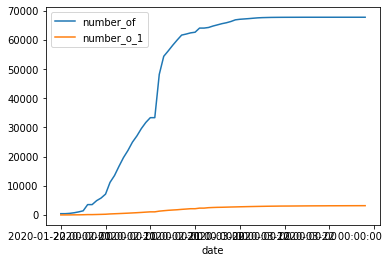

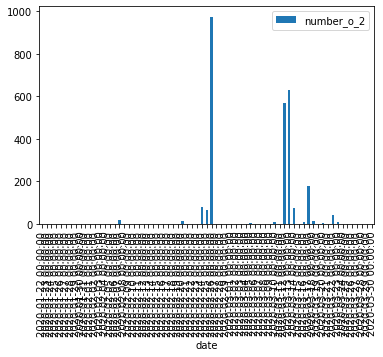

In [0]:
df_jhc_hubei = df_jhc[df_jhc['province_s']=='Hubei'][['date','number_of','number_o_1','number_o_2']]
df_jhc_hubei.sort_values(by=['date'], inplace = True)
print(df_jhc_hubei.shape)
ax1 = df_jhc_hubei.plot(x='date', y=['number_of','number_o_1'], kind = 'line')
ax2 = df_jhc_hubei.plot(x='date', y=['number_o_2'], kind = 'bar')

Add columns of number increasement

In [0]:
df_jhc_ = df_jhc.sort_values(by = ['geometry', 'date'], 
                             ascending = True, na_position = 'last', inplace = False)
df_jhc_.reset_index(inplace = True, drop = True)
df_jhc_['date'] = pd.to_datetime(df_jhc_['date'])

0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
           ...    
17521   2020-03-26
17522   2020-03-27
17523   2020-03-28
17524   2020-03-29
17525   2020-03-30
Name: date, Length: 17526, dtype: datetime64[ns]

In [0]:
print(df_jhc_.shape)
print(df_jhc_[['country_re', 'province_s', 'date', 'number_of']].tail())

(17526, 10)
      country_re province_s                 date  number_of
17521      China    Qinghai  2020-03-26 00:00:00         18
17522      China    Qinghai  2020-03-27 00:00:00         18
17523      China    Qinghai  2020-03-28 00:00:00         18
17524      China    Qinghai  2020-03-29 00:00:00         18
17525      China    Qinghai  2020-03-30 00:00:00         18


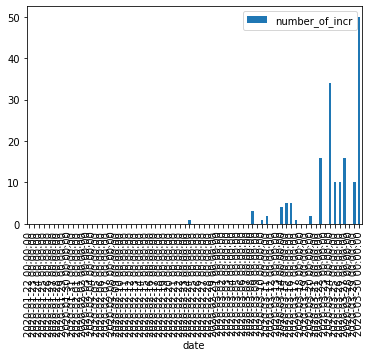

In [0]:
df_jhc_['number_of_incr']   = np.zeros_like(df_jhc_['number_of'])
df_jhc_['number_o_1_incr']  = np.zeros_like(df_jhc_['number_o_1'])

for i in df_jhc_.index:
    if(i == 0 or df_jhc_.loc[i, 'geometry'] != df_jhc_.loc[i-1, 'geometry']):
        df_jhc_.loc[i, 'number_of_incr'] = df_jhc_.loc[i, 'number_of']
        df_jhc_.loc[i, 'number_o_1_incr'] = df_jhc_.loc[i, 'number_o_1']
    else:
        df_jhc_.loc[i, 'number_of_incr'] = df_jhc_.loc[i, 'number_of'] \
                                         - df_jhc_.loc[i-1, 'number_of'] 
        df_jhc_.loc[i, 'number_o_1_incr'] = df_jhc_.loc[i, 'number_o_1'] \
                                          - df_jhc_.loc[i-1, 'number_o_1']

ax = df_jhc_[df_jhc_['country_re'] == 'Afghanistan'][['date', 'number_of_incr']].plot(x='date', y=['number_of_incr'], kind = 'bar')

In [0]:
df_jhc[pd.isna(df_jhc['geometry'])]

,geometry,province_s,country_re,lat,long,date,number_of,number_o_1,number_o_2,objectid


In [0]:
df_jhc_denmark = df_jhc_.loc[df_jhc_['country_re'] == 'Denmark'].loc[pd.isna(df_jhc_['province_s']), 
                                                    ['country_re', 'date', 'number_of', 'number_of_incr', 
                                                     'number_o_1_incr']]
df_jhc_denmark1 = df_jhc_.loc[df_jhc_['country_re'] == 'Denmark'].loc[df_jhc_['province_s'] == 'Greenland',
                                     ['country_re', 'province_s', 'date', 'number_of', 'number_of_incr', 'number_o_1_incr']]
df_jhc_denmark2 = df_jhc_.loc[df_jhc_['country_re'] == 'Denmark'].loc[df_jhc_['province_s'] == "Faroe Islands",\
                                    ['country_re', 'province_s', 'date', 'number_of', 'number_of_incr', 'number_o_1_incr']]

In [0]:
print(df_jhc_.loc[df_jhc_['country_re']=='Denmark']['province_s'].unique())
print(df_jhc_.loc[df_jhc_['country_re']=='Sweden']['province_s'].unique())

['Greenland' 'Faroe Islands' nan]
[nan]


NameError: ignored

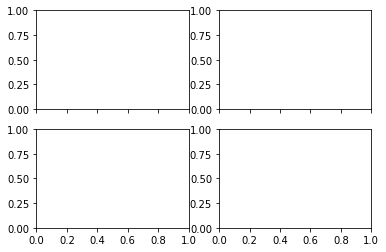

In [0]:

fig, axes = plt.subplots(2,2, sharex = True)
axes[0][0].plot(df_jhc_denmark['date'], df_jhc_denmark['number_of_incr'])
axes[0][1].plot(df_jhc_denmark['date'], df_jhc_denmark['number_o_1_incr'])
axes[1][0].plot(df_jhc_.loc[df_jhc_['country_re'] == 'Sweden', 'date'], 
                df_jhc_.loc[df_jhc_['country_re'] == 'Sweden', 'number_of_incr'])
axes[1][1].plot(df_jhc_.loc[df_jhc_['country_re'] == 'Sweden', 'date'],
                df_jhc_.loc[df_jhc_['country_re'] == 'Sweden', 'number_o_1_incr'])

y_min, y_max = axes[0][0].get_ylim()
y_min = 0
axes[0][0].set_ylim(y_min,y_max)
x_min, x_max = axes[0][0].get_xlim()

### An overview of dataset owd

In [0]:
print(df_owd.shape)
print(df_owd.dtypes)
for col in df_owd.columns:
    print('{:<40}{}'.format(col, len(df_owd[col].unique())))

(11617, 16)
iso_code                     object
location                     object
date                         object
total_cases                   int64
new_cases                     int64
total_deaths                  int64
new_deaths                    int64
total_cases_per_million     float64
new_cases_per_million       float64
total_deaths_per_million    float64
new_deaths_per_million      float64
total_tests                 float64
new_tests                   float64
total_tests_per_thousand    float64
new_tests_per_thousand      float64
tests_units                  object
dtype: object
iso_code                                206
location                                206
date                                    110
total_cases                             2322
new_cases                               948
total_deaths                            701
new_deaths                              302
total_cases_per_million                 5532
new_cases_per_million                   3508

In [0]:
list_iso_owd = df_owd['iso_code'].unique()
for iso in list_iso_owd:
    nc = len(df_owd.loc[df_owd['iso_code'] == iso, 'iso_code'].unique())
    if(nc != 1):
        print(iso, nc)

In [0]:
print(df_owd['tests_units'].unique())

[nan 'tests performed' 'units unclear' 'samples tested' 'cases tested'
 'people tested' 'samples processed' 'tests sampled' 'samples analyzed'
 'tests analysed' 'analysed samples'
 'inconsistent units (COVID Tracking Project)']


In [0]:
df_owd

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.000,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.000,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11612,ZWE,Zimbabwe,2020-04-14,17,3,3,0,1.144,0.202,0.202,0.0,NaN,NaN,NaN,NaN,NaN
11613,ZWE,Zimbabwe,2020-04-15,17,0,3,0,1.144,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN
11614,ZWE,Zimbabwe,2020-04-16,23,6,3,0,1.547,0.404,0.202,0.0,NaN,NaN,NaN,NaN,NaN
11615,ZWE,Zimbabwe,2020-04-17,24,1,3,0,1.615,0.067,0.202,0.0,NaN,NaN,NaN,NaN,NaN


In [0]:
df_owd['iso_code'].unique()

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'CPV', 'CRI', 'CUB',
       'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI',
       'FLK', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB',
       'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM',
       'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR', 'KWT', 'LAO',
       'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA',
       'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT',
       'MMR', 'MNE',

In [0]:
df_owd['location'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'Falkland Islands', 'France', 'Faeroe Islands', 'Gabon',
 

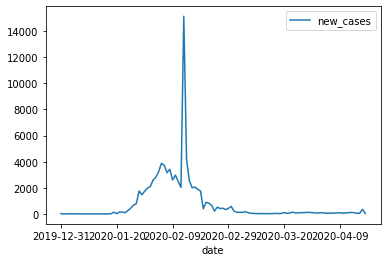

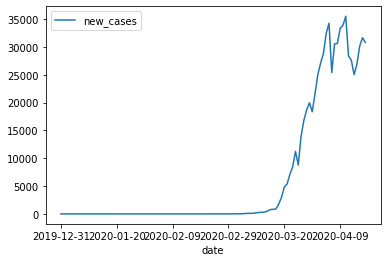

In [0]:
df_owd.loc[df_owd['iso_code'] == 'CHN'].plot(x='date', y=['new_cases'])
df_owd.loc[df_owd['iso_code'] == 'USA'].plot(x='date', y=['new_cases'])

## Strategies are performed at which stage of COVID-19 infection? 

 | Key word |  df_measure    |    df_owd   |
 | :---     |  :---          |    :---     |
 |          |  iso           |   iso_code  |
 |          |  country       |   location  |
 |          | date_implemented/entry_date |  date     |
 |          |  region        |  |

#### Visualization scripts

In [0]:
# define color map
# asign each measure a color
color_measure={}
ic = 0
list_hatch = ['/', '\\', '|', 'x', 'o', 'O', '.', '*', '-', '+', '//', '\\\\', '||', '--']
for c in df_measure['category'].unique():
    list_m = df_measure.loc[df_measure['category']==c]['measure'].unique()
    n_m = len(list_m)
    color_c = mcolors.to_rgb('C'+str(ic))
    color_w = mcolors.to_rgb('w')
    im = 0
    for m in list_m:
       color_m = tuple(map(lambda x, y: x + 0.8*im*(y-x)/n_m, color_c, color_w ))
       hatch_m = list_hatch[im]
       color_measure[m] = {'color': color_m, 'hatch': hatch_m, 'category': c}
       im = im + 1
    color_measure[c] = {'color': color_c, 'category': c}
    ic=ic+1


In [0]:
# define iso -- country name map
iso_country = {}
for iso in df_measure['iso'].unique():
    country_name = df_measure.loc[df_measure['iso']==iso, 'country'].unique()[0]
    iso_country[iso] = country_name
for iso in df_owd['iso_code'].unique():
    country_name = df_owd.loc[df_owd['iso_code']==iso, 'location'].unique()[0]
    if(iso in iso_country and country_name != iso_country[iso]):
        print('{:<5}{:<30}{:<30}'.format(iso, iso_country[iso], country_name))
    iso_country[iso] = country_name   

BRN  Brunei Darussalam             Brunei                        
CIV  Côte d'Ivoire                 Cote d'Ivoire                 
COD  Congo DR                      Democratic Republic of Congo  
CPV  Cabo Verde                    Cape Verde                    
KOR  Korea Republic of             South Korea                   
LAO  Lao PDR                       Laos                          
MDA  Moldova Republic Of           Moldova                       
MKD  North Macedonia Republic Of   Macedonia                     
RUS  Russian Federation            Russia                        
SWZ  Eswatini                      Swaziland                     
TLS  Timor-Leste                   Timor                         
USA  United States of America      United States                 
VNM  Viet Nam                      Vietnam                       


In [0]:
iso_country

{'ABW': 'Aruba',
 'AFG': 'Afghanistan',
 'AGO': 'Angola',
 'AIA': 'Anguilla',
 'ALB': 'Albania',
 'AND': 'Andorra',
 'ARE': 'United Arab Emirates',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ATG': 'Antigua and Barbuda',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BDI': 'Burundi',
 'BEL': 'Belgium',
 'BEN': 'Benin',
 'BES': 'Bonaire Sint Eustatius and Saba',
 'BFA': 'Burkina Faso',
 'BGD': 'Bangladesh',
 'BGR': 'Bulgaria',
 'BHR': 'Bahrain',
 'BHS': 'Bahamas',
 'BIH': 'Bosnia and Herzegovina',
 'BLR': 'Belarus',
 'BLZ': 'Belize',
 'BMU': 'Bermuda',
 'BOL': 'Bolivia',
 'BRA': 'Brazil',
 'BRB': 'Barbados',
 'BRN': 'Brunei',
 'BTN': 'Bhutan',
 'BWA': 'Botswana',
 'CAF': 'Central African Republic',
 'CAN': 'Canada',
 'CHE': 'Switzerland',
 'CHL': 'Chile',
 'CHN': 'China',
 'CIV': "Cote d'Ivoire",
 'CMR': 'Cameroon',
 'COD': 'Democratic Republic of Congo',
 'COG': 'Congo',
 'COL': 'Colombia',
 'COM': 'Comoros',
 'CPV': 'Cape Verde',
 'CRI': 'Costa Rica',
 'CUB': 'Cuba',
 '

In [0]:
def plot_curv_meas(ax, iso, col_c, list_meas, col_c2 = None):
    df_owd_1 = df_owd.loc[df_owd['iso_code'] == iso,['date', col_c]]
    if(col_c2):
        df_owd_1 = df_owd.loc[df_owd['iso_code'] == iso, ['date', col_c, col_c2]]
    df_owd_1
    df_owd_1.sort_values(by = 'date', inplace = True)
    #ax.plot(df_owd_1['date'], df_owd_1[col_c])
    ax.plot('date', col_c, data=df_owd_1)
    if(col_c2):
        ax_y2=ax.twinx()
        ax_y2.plot(df_owd_1['date'], df_owd_1[col_c2], 'r-')
        ax_y2.set_ylim(0, ax_y2.get_ylim()[1])
        ax_y2.tick_params(axis = 'y', labelcolor = 'r')

    y_min, y_max = ax.get_ylim()
    y_min = 0
    ax.set_ylim(y_min, y_max)
    n_meas = len(list_meas)
    y_sep = (y_max - y_min)/n_meas
    x_min, x_max = ax.get_xlim()
    im = 0
    for m in list_meas:
        xx = df_measure.loc[df_measure['iso']==iso].loc[df_measure['measure'] == m, ['date_implemented', 'entry_date']]
        if(xx.shape[0]<1): continue
        x0 = xx['date_implemented'].iloc[0]
        if(pd.isna(x0)):
            x0 = xx['entry_date'].iloc[0]
        if(pd.isna(x0)):
            print('No date for entry \n {}'.format(df_measure.loc[df_measure['iso']==iso].loc[df_measure['measure']==m]))
            continue
        x0 = mdates.date2num(x0)
        y0 = y_sep*im
        x_sep = x_max - x0
        rect = plt.Rectangle((x0,y0), x_sep, y_sep, alpha = 0.2, color=color_measure[m]['color'], hatch = color_measure[m]['hatch'])
        ax.add_patch(rect)
        im = im + 1
    ax.set_title(iso_country[iso] + "  " + col_c)
    if(col_c2):
        ax.set_title(iso_country[iso] + "  " + col_c + "/" + col_c2)
    
    # format the ticks
    years = mdates.YearLocator()
    months = mdates.MonthLocator()
    years_fmt = mdates.DateFormatter('%Y-%m')
    months_fmt = mdates.DateFormatter('%m')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(months_fmt)
    ax.grid(True, which = 'both')
    

    return

In [0]:
def color_legend(ax, list_meas):
    ax.set_xlim(0,1)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    x0 = x_min
    x_sep = 0.1*(x_max-x_min)
    y_sep = (y_max-y_min)/len(list_meas)
    im = 0
    for m in list_meas[::-1]:
        y0 = y_max - im*y_sep
        rect = plt.Rectangle((x0,y0), x_sep, 0.8*y_sep, alpha = 0.2, 
                             color = color_measure[m]['color'], hatch = color_measure[m]['hatch'])
        ax.add_patch(rect)
        ax.text(x0+x_sep, y0+0.4*y_sep, m, va = 'center')
        im = im + 1
    ax.axis('off')
    ax.plot()
    return

In [0]:
df_measure['date_implemented'] = pd.to_datetime(df_measure['date_implemented'])
df_measure['entry_date'] = pd.to_datetime(df_measure['entry_date'])
df_owd['date'] = pd.to_datetime(df_owd['date'])

### Visualization & analysis

The measures are in six categories as listed below. The categories 
- <font color="gray">Governance and socio-economic measures</font>
- <font color="gray">Humanitarian exemption</font>

are out of the scope here.

- Public health measures
- Social distancing
- Movement restrictions
- Lockdown


In [0]:
list_cat = list(df_measure['category'].unique())
print(list_cat)
list_cat.remove("Governance and socio-economic measures")
list_cat.remove("Humanitarian exemption")
print(list_cat)

['Public health measures', 'Governance and socio-economic measures', 'Social distancing', 'Movement restrictions', 'Lockdown', 'Humanitarian exemption']
['Public health measures', 'Social distancing', 'Movement restrictions', 'Lockdown']


In [0]:
df_measure.loc[df_measure['category']=="Humanitarian exemption"] ['comments'].unique()

array(['pharmacists are to be allowed by law to dispense medicines outside the dates spelled out in prescriptions according to their own professional judgement',
       'government announced that relief flights will be exempt from the country-wide flight suspension; aid workers however are not permitted to leave the country for R&R until 15 April'],
      dtype=object)

['Limit public gatherings' 'Schools closure' 'Public services closure'
 'Changes in prison-related policies']


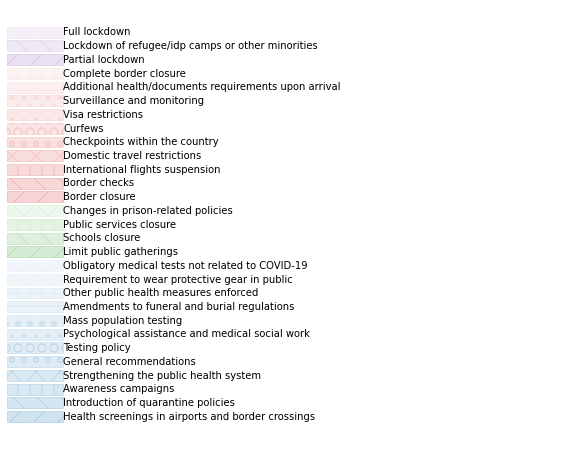

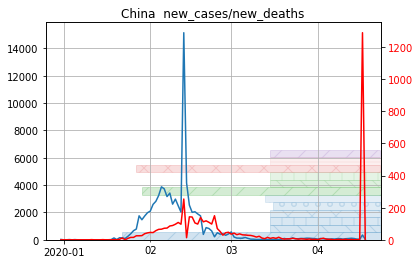

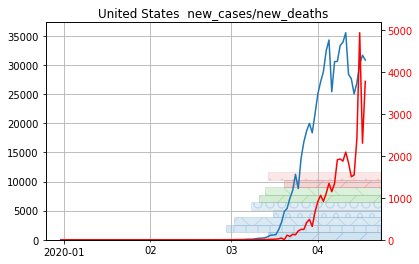

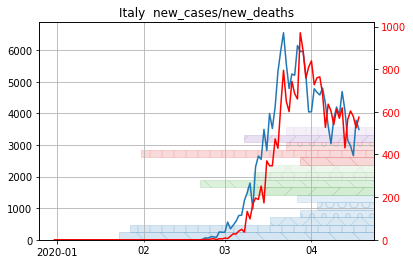

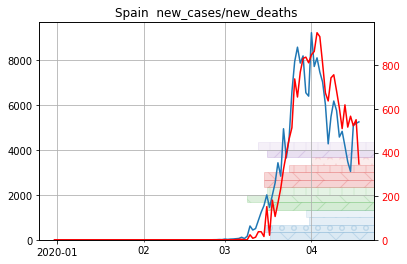

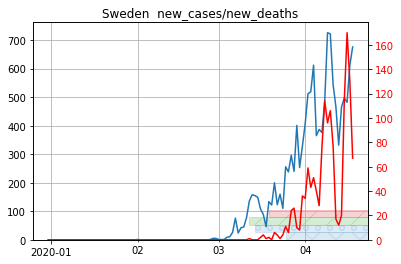

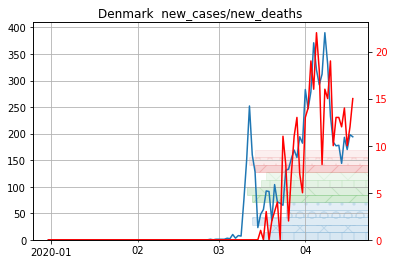

In [0]:
list_meas = df_measure.loc[df_measure['category'] == 'Social distancing']['measure'].unique()
print(list_meas)

list_meas = []
for cat in list_cat:
    list_meas.extend(df_measure.loc[df_measure['category']==cat]['measure'].unique())

fig, axc = plt.subplots(1,1,figsize=(10,8))
color_legend(axc, list_meas)

for iso in ['CHN', 'USA', 'ITA', 'ESP', 'SWE', 'DNK']:
    fig, ax1 = plt.subplots(1,1)
    plot_curv_meas(ax1, iso, 'new_cases', list_meas, col_c2 = 'new_deaths')

## How the measures bend or flatten the curve?

The confirmed cases and deaths are plotted along time and are originated at the day a specific measure was implemented.

In [0]:

def plot_curv(ax, col_c, meas):
    list_iso = df_measure[df_measure['measure'] == meas]['iso'].unique()
    # Add a column that how many days it has past since a measure was implemented
    for iso in list_iso:
        xx = df_measure.loc[df_measure['measure'] == meas].loc[df_measure['iso']==iso]['date_implemented']
        if(xx.shape[0]<1):
            xx = df_measure.loc[df_measure['measure'] == meas].loc[df_measure['iso']==iso]['entry_date']
            if(pd.isna(xx.iloc[0])):
                continue
        day0 = xx.sort_values(ascending=True).iloc[0]
        if(pd.isna(day0)):
            continue
        df_owd_measure_iso = df_owd.loc[df_owd['iso_code']==iso,['date', col_c]]
        df_owd_measure_iso['days'] = df_owd_measure_iso['date'] - day0
        df_owd_measure_iso.sort_values(by=['days'], inplace = True)
        ax.plot(df_owd_measure_iso['days']/np.timedelta64(1, 'D'), df_owd_measure_iso[col_c])
    
    return
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

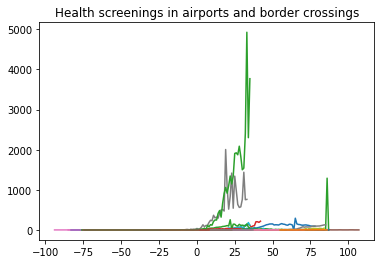

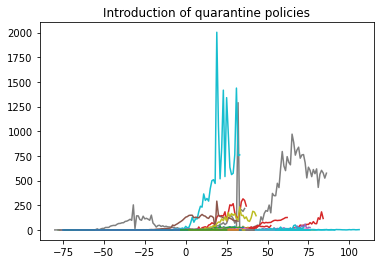

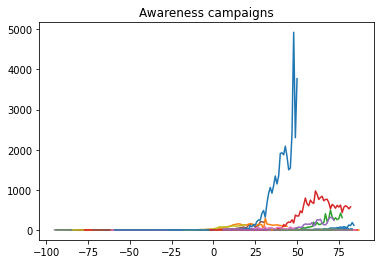

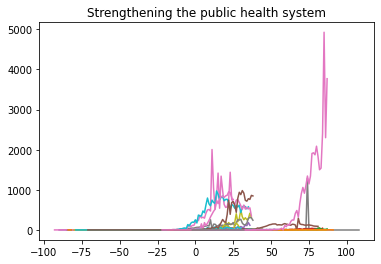

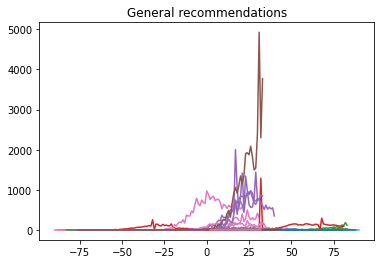

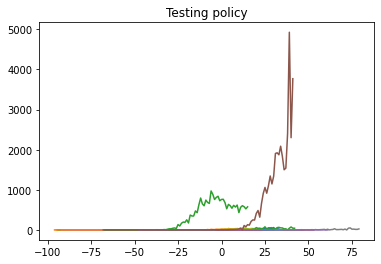

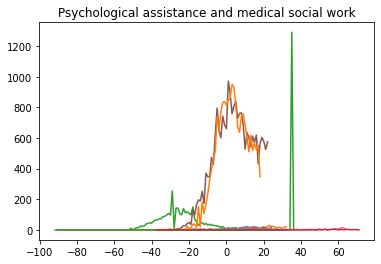

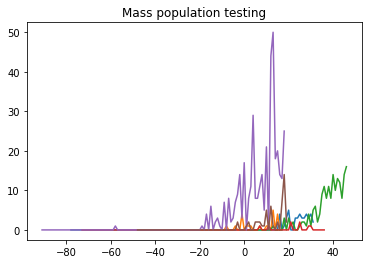

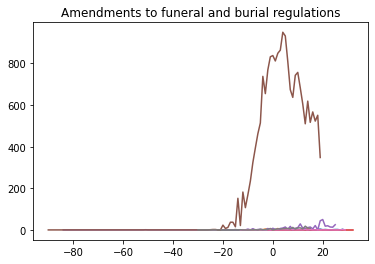

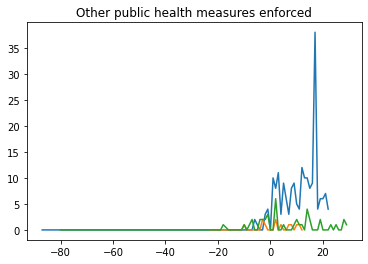

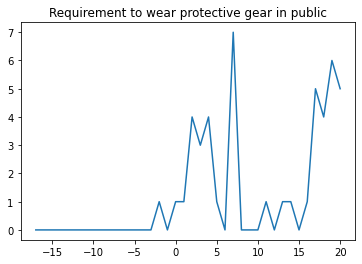

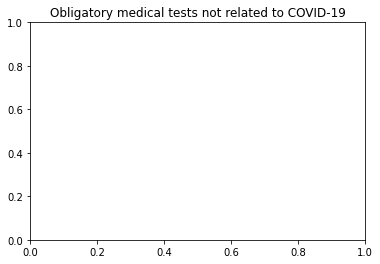

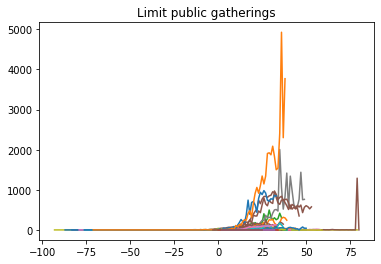

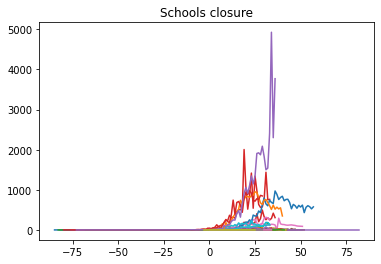

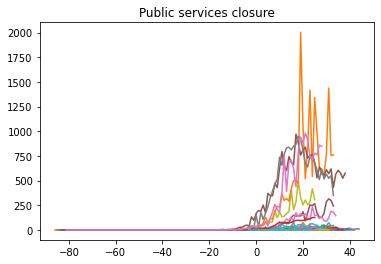

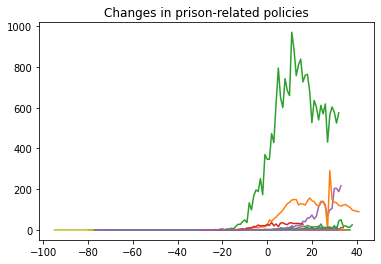

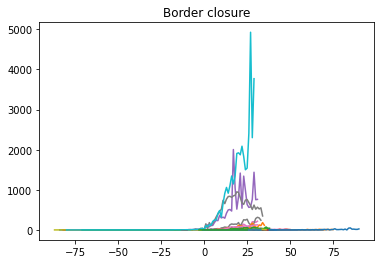

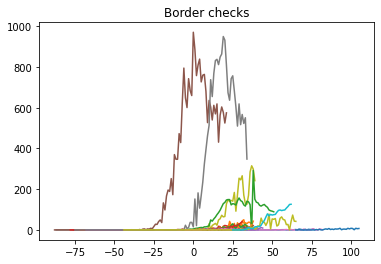

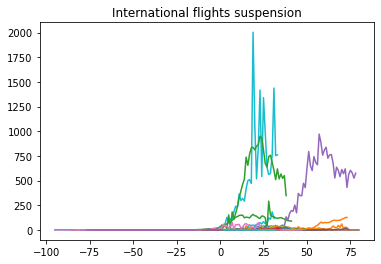

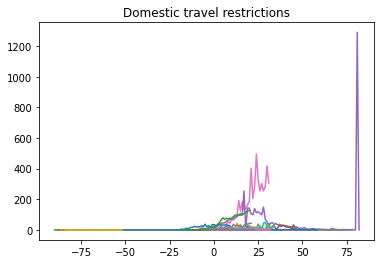

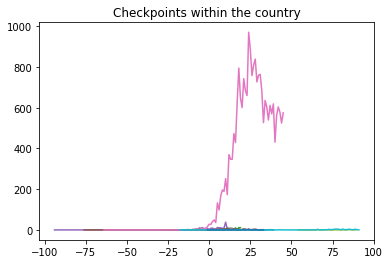

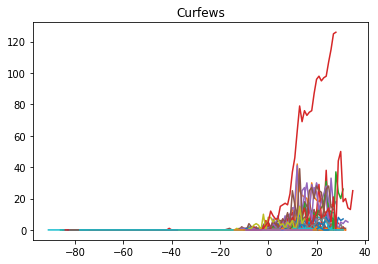

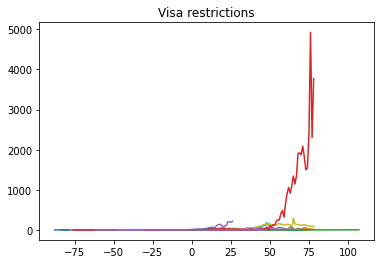

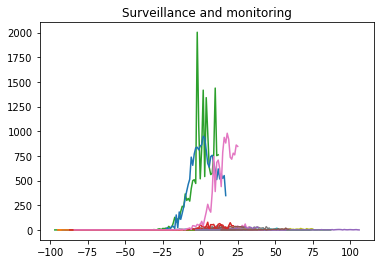

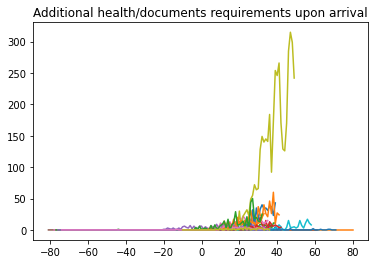

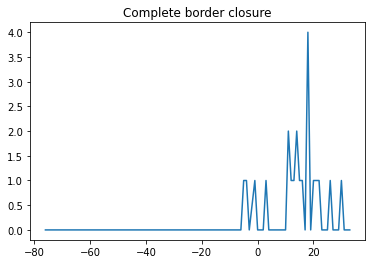

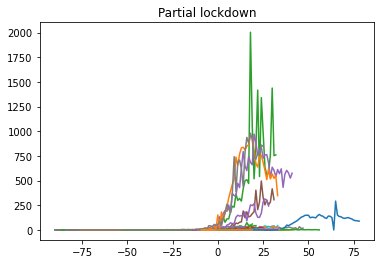

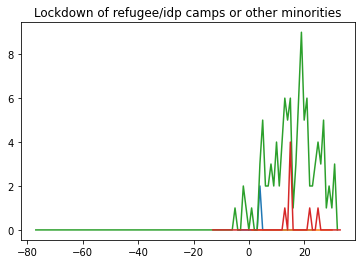

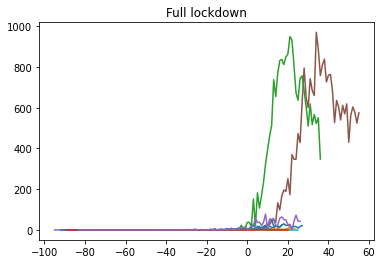

In [0]:
for m in list_meas:
    fig, ax1 = plt.subplots(1,1)
    plot_curv(ax1, 'new_deaths', m)
    ax1.set_title(m)

## Appendix: dataset description 

### ACAPS COVID-19: Govenment Measures Dataset -- The Humanitarian Data Exchange
The COVID-19 Govenment Measures Dataset puts together all the measures implemented by govenments worldwide in response to the Coronavirus pandemic.

| column              |           |
| :---                |  :---     |
| id                  | ID for each entry. 2 duplicated id are observed but with different contents.          |
| country             |  Country or region.   |
| iso                 |  [ISO 3166 country codes](https://www.iso.org/iso-3166-country-codes.html).  |
| admin_level_name    |    |
| pcode               |  Only missing values. No meaning. |
| region              |  Continent.  |
| category            |  Measures are devided in to 5 categories.    |
| measure             |   |
| targeted_pop_group  |   |
| comments            |   |
| non_compliance      |   |
| date_implemented    |    |
| source              |   |
| source_type         |  |
| link                |  |
| entry_date          |  |
| alternative_source  |  |


### jhu covid19 time series -- Esri

Source: John Hopkins Center for Systems Science and Engineering feature layer. The City of LA had trouble linking directly to JHU's feature service, so we built an ETL to ingest their CSVs every hour and return a public feature layer for our use.

| Column  |          |
| :---    |  :---    |
| geometry    |  Geographic coordinate (longitude, latitude).
| province_s  |  Province or state.
| country_re  |  Country or region. 
| lat         |  Latitude
| long        |  Longitude
| date        |  Date 
| number_of   |  Accumulated confirmed cases.  
| number_o_1  |  Accumulated deaths. 
| number_o_2  |  ???
| objectid    |  A unique ID for each observations.
